In [1]:
import pandas as pd
import h2o
import numpy as np
import os
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt


/Users/weizheng/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/Users/weizheng/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/weizheng/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/weizheng/anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(ke

In [2]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
print train_df.shape
print train_df.dtypes
print train_df.columns

(878049, 9)
Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object
Index([u'Dates', u'Category', u'Descript', u'DayOfWeek', u'PdDistrict',
       u'Resolution', u'Address', u'X', u'Y'],
      dtype='object')


In [3]:
train_df.head(5)

/Users/weizheng/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/weizheng/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [186]:
crime_count = train_df["Category"].value_counts()

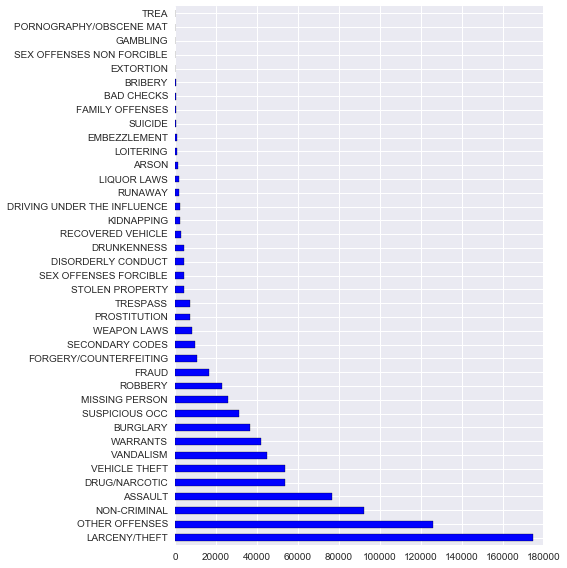

In [196]:
fig = plt.Figure(figsize=(3,4))
ax = crime_count.plot(kind="barh",figsize=(8,8))
#ax.set_xscale('log')
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('fig1.png', dpi = 300)

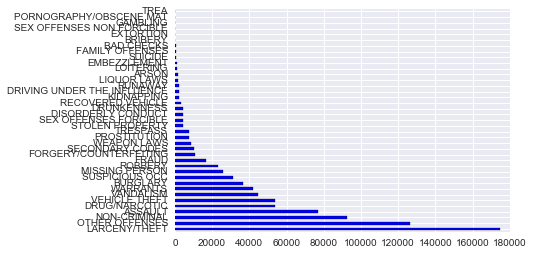

In [188]:
lt = df[train_df[""]]

In [197]:
print train_df.columns.values

['Dates' 'Category' 'Descript' 'DayOfWeek' 'PdDistrict' 'Resolution'
 'Address' 'X' 'Y']


In [198]:
train_df["Dates"] = pd.to_datetime(train_df["Dates"])

In [199]:
cat_dat = train_df[['Dates', 'Category']]

In [201]:
cat_dat = cat_dat.pivot_table(index='Dates', columns='Category', aggfunc=len, fill_value=0)

In [208]:
cat_dat.reset_index(inplace=True)

In [218]:
cat_dat_gr = cat_dat.groupby(cat_dat['Dates'].dt.date).sum()

In [237]:
cat_month_gr = cat_dat.groupby(cat_dat['Dates'].dt.month).sum()

In [236]:
cat_day_gr = cat_dat.groupby(cat_dat['Dates'].dt.dayofweek).sum()

In [243]:
cat_hour_gr = cat_dat.groupby(cat_dat['Dates'].dt.hour).sum()
cat_hour_gr.reset_index(inplace=True)

In [229]:
cat_month_gr.reset_index(inplace=True)

In [220]:
cat_dat_gr.reset_index(inplace=True)

In [238]:
cat_day_gr.reset_index(inplace=True)

In [221]:
print cat_dat_gr.columns.values

['Dates' 'ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY'
 'DISORDERLY CONDUCT' 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC'
 'DRUNKENNESS' 'EMBEZZLEMENT' 'EXTORTION' 'FAMILY OFFENSES'
 'FORGERY/COUNTERFEITING' 'FRAUD' 'GAMBLING' 'KIDNAPPING' 'LARCENY/THEFT'
 'LIQUOR LAWS' 'LOITERING' 'MISSING PERSON' 'NON-CRIMINAL' 'OTHER OFFENSES'
 'PORNOGRAPHY/OBSCENE MAT' 'PROSTITUTION' 'RECOVERED VEHICLE' 'ROBBERY'
 'RUNAWAY' 'SECONDARY CODES' 'SEX OFFENSES FORCIBLE'
 'SEX OFFENSES NON FORCIBLE' 'STOLEN PROPERTY' 'SUICIDE' 'SUSPICIOUS OCC'
 'TREA' 'TRESPASS' 'VANDALISM' 'VEHICLE THEFT' 'WARRANTS' 'WEAPON LAWS']


In [244]:
x = cat_hour_gr['Dates']

In [245]:
cols =cat_hour_gr.columns.values

ARSON
ASSAULT
BAD CHECKS
BRIBERY
BURGLARY
DISORDERLY CONDUCT
DRIVING UNDER THE INFLUENCE
DRUG/NARCOTIC
DRUNKENNESS
EMBEZZLEMENT
EXTORTION
FAMILY OFFENSES
FORGERY/COUNTERFEITING
FRAUD
GAMBLING
KIDNAPPING
LARCENY/THEFT
LIQUOR LAWS
LOITERING
MISSING PERSON
NON-CRIMINAL
OTHER OFFENSES
PORNOGRAPHY/OBSCENE MAT
PROSTITUTION
RECOVERED VEHICLE
ROBBERY
RUNAWAY
SECONDARY CODES
SEX OFFENSES FORCIBLE
SEX OFFENSES NON FORCIBLE
STOLEN PROPERTY
SUICIDE
SUSPICIOUS OCC
TREA
TRESPASS
VANDALISM
VEHICLE THEFT
WARRANTS
WEAPON LAWS


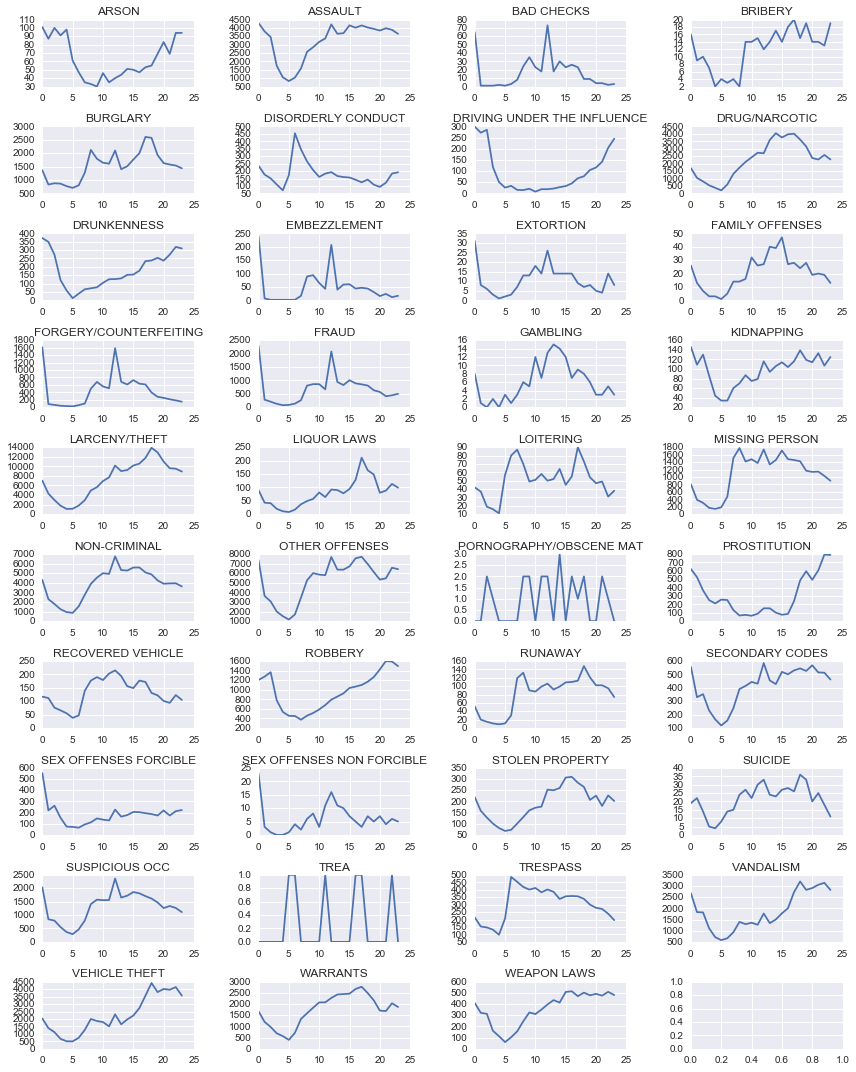

In [246]:
fig, axes = plt.subplots(10,4)
plt.rcParams["figure.figsize"] = (12,15)
c = 1
for i in xrange(10):
    for j in xrange(4):
        if c < 40:
            col = cols[c]
            print col
            y = cat_hour_gr[col]
            axes[i,j].plot(x, y)
            axes[i,j].set_title(col)
            c+=1
fig.tight_layout()
fig.savefig('cc_hour.png', dpi = 300)

In [206]:
ax = axes[0]

In [227]:
cat_dat_gr.head(5)

Category,Dates,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,2003-01-06,0,35,1,0,16,0,0,35,0,...,0,3,0,12,0,5,18,43,22,4
1,2003-01-07,0,50,0,0,10,2,0,36,3,...,0,4,0,13,0,7,19,34,37,4
2,2003-01-08,1,35,0,0,24,12,1,49,4,...,0,2,0,8,0,4,21,38,37,3
3,2003-01-09,0,30,2,0,18,2,1,30,0,...,0,2,0,9,0,4,22,33,49,4
4,2003-01-10,1,40,1,0,19,2,2,32,4,...,0,2,0,13,0,2,18,39,22,5


In [ ]:
a

In [166]:
len(train_df["Address"].unique())

23228

In [155]:
print test_df.columns.values

['Id' 'Dates' 'DayOfWeek' 'PdDistrict' 'Address' 'X' 'Y']


In [148]:
coor = train_df[["Y", "X"]]

In [150]:
coor.columns = ["Latitude", "Longitude"]

In [152]:
coor.to_csv("coor.csv", index=False)

In [72]:
h2o.init()



No instance found at ip and port: localhost:54321. Trying to start local jar...


JVM stdout: /var/folders/m8/p61gkkts6pscj23gb90s8zjh0000gn/T/tmpzeo0xp/h2o_weizheng_started_from_python.out
JVM stderr: /var/folders/m8/p61gkkts6pscj23gb90s8zjh0000gn/T/tmpq4nsBp/h2o_weizheng_started_from_python.err
Using ice_root: /var/folders/m8/p61gkkts6pscj23gb90s8zjh0000gn/T/tmpc8HuLC


Java Version: java version "1.8.0_65"
Java(TM) SE Runtime Environment (build 1.8.0_65-b17)
Java HotSpot(TM) 64-Bit Server VM (build 25.65-b01, mixed mode)


Starting H2O JVM and connecting: ................... Connection successful!


H2O cluster uptime:,2 seconds 40 milliseconds
H2O cluster version:,3.8.0.6
H2O cluster name:,H2O_started_from_python_weizheng_qsb130
H2O cluster total nodes:,1
H2O cluster total free memory:,3.56 GB
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster healthy:,True
H2O Connection ip:,127.0.0.1
H2O Connection port:,54321
H2O Connection proxy:,None


In [73]:
h2o.remove_all()

In [272]:
train_hf = h2o.upload_file("./train.csv", header=1, sep=",", destination_frame="train_original")


Parse Progress: [##################################################] 100%


In [273]:
%%capture train_info
train_hf.describe()

In [275]:
def get_summary(info):
    info = info.outputs[2]
    summary = pd.read_html(info.data['text/html'], index_col=0, header=0)[0].ix[0:7].T
    summary[["mins","mean","maxs","sigma","zeros","missing"]]= summary[["mins","mean","maxs","sigma","zeros","missing"]].apply(lambda s: pd.to_numeric(s))
    return summary
train_summary = get_summary(train_info)

In [276]:
print train_summary

            type          mins          mean          maxs         sigma  \
Dates       time  1.041829e+12  1.237208e+12  1.431576e+12  1.145094e+11   
Category    enum  0.000000e+00           NaN  3.800000e+01           NaN   
Descript    enum  0.000000e+00           NaN  8.780000e+02           NaN   
DayOfWeek   enum  0.000000e+00           NaN  6.000000e+00           NaN   
PdDistrict  enum  0.000000e+00           NaN  9.000000e+00           NaN   
Resolution  enum  0.000000e+00           NaN  1.600000e+01           NaN   
Address     enum  0.000000e+00           NaN  2.322700e+04           NaN   
X           real -1.225136e+02 -1.224226e+02 -1.205000e+02  3.035362e-02   
Y           real  3.770788e+01  3.777102e+01  9.000000e+01  4.568931e-01   

             zeros  missing  
Dates            0       47  
Category      1513        0  
Descript       101        0  
DayOfWeek   133734        0  
PdDistrict   89431        0  
Resolution  206403        0  
Address          1        0  

In [308]:
crime_cat = train_hf["Category"].unique()
print crime_cat
print len(crime_cat)

C1
---------------------------
ARSON
ASSAULT
BAD CHECKS
BRIBERY
BURGLARY
DISORDERLY CONDUCT
DRIVING UNDER THE INFLUENCE
DRUG/NARCOTIC
DRUNKENNESS
EMBEZZLEMENT

[39 rows x 1 column]
39


In [405]:
crime_count = train_hf["Category"].group_by(by=["Category"]).count()

In [406]:
crime_count = crime_count.frame

In [407]:
crime_count['perc'] = crime_count["nrow_Category"] / crime_count["nrow_Category"].sum()

In [408]:
rare_lvls = crime_count["Category"][crime_count["perc"] < 0.01]

In [409]:
rl_df = rare_lvls.as_data_frame(use_pandas=True)

In [329]:
print crime_count_df.query("perc < 0.01").count()
print crime_count_df.query("perc < 0.01").sum()
rare_lvls = crime_count_df.query("perc < 0.01")["Category"]
print rare_lvls

Category         24
nrow_Category    24
perc             24
dtype: int64
Category         TREAPORNOGRAPHY/OBSCENE MATGAMBLINGSEX OFFENSE...
nrow_Category                                                58665
perc                                                     0.0668129
dtype: object
33                           TREA
22        PORNOGRAPHY/OBSCENE MAT
14                       GAMBLING
29      SEX OFFENSES NON FORCIBLE
10                      EXTORTION
3                         BRIBERY
2                      BAD CHECKS
11                FAMILY OFFENSES
31                        SUICIDE
9                    EMBEZZLEMENT
18                      LOITERING
0                           ARSON
17                    LIQUOR LAWS
26                        RUNAWAY
6     DRIVING UNDER THE INFLUENCE
15                     KIDNAPPING
24              RECOVERED VEHICLE
8                     DRUNKENNESS
5              DISORDERLY CONDUCT
28          SEX OFFENSES FORCIBLE
30                STOLEN PROPERT

### Drop missing dates since only 47 out of 878049 rows

In [440]:
train_no_missing = train_hf[~train_hf['Dates'].isna(),:]

In [433]:
train_no_missing[train_no_missing["Category"].isin(list(rl_df["Category"].values))].dim

[58659, 9]

In [372]:
lvls = train_no_missing["Category"].unique()

In [373]:
lvls.as_data_frame(use_pandas=True)

,C1
0,ARSON
1,ASSAULT
2,BAD CHECKS
3,BRIBERY
4,BURGLARY
5,DISORDERLY CONDUCT
6,DRIVING UNDER THE INFLUENCE
7,DRUG/NARCOTIC
8,DRUNKENNESS
9,EMBEZZLEMENT


In [386]:
print rare_lvls

Category
---------------------------
ARSON
BAD CHECKS
BRIBERY
DISORDERLY CONDUCT
DRIVING UNDER THE INFLUENCE
DRUNKENNESS
EMBEZZLEMENT
EXTORTION
FAMILY OFFENSES
GAMBLING

[24 rows x 1 column]


In [441]:
train_no_missing[train_no_missing["Category"].isin(list(rl_df["Category"].values)),"Category"]= 999

In [443]:
train_no_missing["Category"] = train_no_missing["Category"].asfactor()

In [444]:
train_no_missing["Category"].unique()

C1
1
4
7
12
13
16
19
20
21
25


In [424]:
len(train_no_missing["Category"].isin(list(rl_df["Category"].values)))

878002

In [445]:
train_no_missing["year"] = train_no_missing["Dates"].year()
train_no_missing["month"] = train_no_missing["Dates"].month()
train_no_missing["hour"] = train_no_missing["Dates"].hour()


In [417]:
len(train_no_missing["Category"].unique())

39

In [446]:
train_no_missing = train_no_missing.drop("Dates")
train_no_missing = train_no_missing.drop("Descript")
train_no_missing = train_no_missing.drop("Resolution")
addresses_no_number = train_no_missing["Address"].gsub("^\\d+\\s+", '')
train_no_missing["Address"] = addresses_no_number

In [447]:
train_st, valid_set = train_no_missing.split_frame(ratios=[0.7], destination_frames=["train_set", "valid_set"], seed=1234)

In [292]:
train_st.head(5)

Category,DayOfWeek,PdDistrict,Address,X,Y,year,month,hour
OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.7746,2015,5,23
OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424,37.8004,2015,5,23
LARCENY/THEFT,Wednesday,PARK,Block of BRODERICK ST,-122.439,37.7715,2015,5,23
LARCENY/THEFT,Wednesday,INGLESIDE,Block of TEDDY AV,-122.403,37.7134,2015,5,23
VEHICLE THEFT,Wednesday,INGLESIDE,AVALON AV / PERU AV,-122.423,37.7251,2015,5,23


In [448]:
target = "Category"


In [449]:
ind_vars = list(set(train_no_missing.col_names) - set([target]))

In [450]:
ind_vars

[u'DayOfWeek',
 u'hour',
 u'year',
 u'month',
 u'PdDistrict',
 u'Address',
 u'Y',
 u'X']

In [299]:
ind_vars = [u'DayOfWeek', 'hour', 'year', 'month', u'Address', 'PdDistrict', 'Y', "X"]

In [300]:
from h2o.estimators import H2OGeneralizedLinearEstimator

In [302]:
glm_classifier = H2OGeneralizedLinearEstimator(model_id="sf_logit", family="multinomial")

TypeError: __init__() got an unexpected keyword argument 'balance_classes'

In [270]:
glm_classifier.train(x = ind_vars, y = target, training_frame=train_st, validation_frame=valid_set)


glm Model Build Progress: [##################################################] 100%


In [266]:
glm_classifier

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  sf_logit

GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,multinomial,multinomial,"Elastic Net (alpha = 0.5, lambda = 6.004E-5 )",1093,1092,105,train_set




ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.787285873331

ModelMetricsMultinomialGLM: glm
** Reported on validation data. **

MSE: 0.787763920057

Scoring History: 


,timestamp,duration,iteration,negative_log_likelihood,objective
,2016-03-10 21:07:43,0.000 sec,1,1647756.8198800,2.6803515
,2016-03-10 21:07:45,2.045 sec,2,1646286.2920200,2.6779595
,2016-03-10 21:07:48,4.674 sec,3,1646235.6900500,2.6778772
,2016-03-10 21:07:50,6.575 sec,4,1646235.0398200,2.6778761
,2016-03-10 21:07:52,8.539 sec,5,1645469.3515000,2.6766306
---,---,---,---,---,---
,2016-03-10 21:11:50,4 min 6.716 sec,101,1572609.4422100,2.5581118
,2016-03-10 21:11:52,4 min 8.661 sec,102,1572591.0933600,2.5580819
,2016-03-10 21:11:54,4 min 10.690 sec,103,1572511.1402100,2.5579519
,2016-03-10 21:11:56,4 min 12.644 sec,104,1572553.7153800,2.5580211



See the whole table with table.as_data_frame()


In [451]:
from h2o.estimators import H2OGradientBoostingEstimator

In [476]:
gbm_classifier = H2OGradientBoostingEstimator(distribution="multinomial", ntrees=150, max_depth=3, min_rows=2, learn_rate=0.01)

In [474]:
gbm_classifier.train(x = ind_vars, y = target, training_frame=train_st, validation_frame=valid_set)


gbm Model Build Progress: [##################################################] 100%


In [475]:
gbm_classifier

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Method
Model Key:  GBM_model_python_1457483143760_12

Model Summary: 


,number_of_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,2400.0,384253.0,3.0,3.0,3.0,8.0,8.0,8.0




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.820244629901
R^2: 0.957946347606
LogLoss: 2.46654558915

Confusion Matrix: vertical: actual; across: predicted



1,4,7,12,13,16,19,20,21,25,27,32,35,36,37,999,Error,Rate
2089.0,0.0,4021.0,0.0,0.0,33670.0,216.0,549.0,9090.0,0.0,0.0,0.0,0.0,2893.0,0.0,1189.0,0.9611110,"51,628 / 53,717"
566.0,0.0,609.0,0.0,0.0,20470.0,81.0,153.0,1956.0,0.0,0.0,0.0,0.0,1484.0,0.0,312.0,1.0,"25,631 / 25,631"
371.0,0.0,10699.0,0.0,0.0,15764.0,64.0,360.0,9027.0,0.0,0.0,0.0,0.0,1082.0,0.0,489.0,0.7173764,"27,157 / 37,856"
55.0,0.0,204.0,0.0,0.0,5820.0,17.0,63.0,876.0,0.0,0.0,0.0,0.0,312.0,0.0,98.0,1.0,"7,445 / 7,445"
100.0,0.0,415.0,0.0,0.0,9250.0,16.0,148.0,1237.0,0.0,0.0,0.0,0.0,330.0,0.0,179.0,1.0,"11,675 / 11,675"
1240.0,0.0,2825.0,0.0,0.0,97012.0,98.0,909.0,15723.0,0.0,0.0,0.0,0.0,3522.0,0.0,1045.0,0.2072499,"25,362 / 122,374"
335.0,0.0,458.0,0.0,0.0,12459.0,1379.0,257.0,1968.0,0.0,0.0,0.0,0.0,1226.0,0.0,250.0,0.9247763,"16,953 / 18,332"
879.0,0.0,3598.0,0.0,0.0,46504.0,96.0,923.0,9498.0,0.0,0.0,0.0,0.0,1932.0,0.0,1071.0,0.9856901,"63,578 / 64,501"
1237.0,0.0,7043.0,0.0,0.0,47061.0,188.0,780.0,27740.0,0.0,0.0,0.0,0.0,3035.0,0.0,1463.0,0.6867200,"60,807 / 88,547"
608.0,0.0,931.0,0.0,0.0,9046.0,26.0,152.0,4445.0,0.0,0.0,0.0,0.0,563.0,0.0,401.0,1.0,"16,172 / 16,172"



Top-10 Hit Ratios: 


k,hit_ratio
1,0.2395609
2,0.3862195
3,0.4921204
4,0.5788706
5,0.6565553
6,0.7227411
7,0.776849
8,0.8240695
9,0.8642791
10,0.8987872



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.820290505703
R^2: 0.958135150432
LogLoss: 2.46662552785

Confusion Matrix: vertical: actual; across: predicted



1,4,7,12,13,16,19,20,21,25,27,32,35,36,37,999,Error,Rate
909.0,0.0,1722.0,0.0,0.0,14571.0,68.0,257.0,3881.0,0.0,0.0,0.0,0.0,1244.0,0.0,502.0,0.9607411,"22,245 / 23,154"
279.0,0.0,244.0,0.0,0.0,8895.0,38.0,61.0,826.0,0.0,0.0,0.0,0.0,642.0,0.0,133.0,1.0,"11,118 / 11,118"
176.0,0.0,4529.0,0.0,0.0,6808.0,26.0,144.0,3770.0,0.0,0.0,0.0,0.0,449.0,0.0,212.0,0.7189401,"11,585 / 16,114"
28.0,0.0,92.0,0.0,0.0,2473.0,5.0,35.0,373.0,0.0,0.0,0.0,0.0,129.0,0.0,29.0,1.0,"3,164 / 3,164"
48.0,0.0,162.0,0.0,0.0,3996.0,4.0,57.0,527.0,0.0,0.0,0.0,0.0,155.0,0.0,55.0,1.0,"5,004 / 5,004"
541.0,0.0,1281.0,0.0,0.0,41720.0,55.0,373.0,6615.0,0.0,0.0,0.0,0.0,1530.0,0.0,405.0,0.2056359,"10,800 / 52,520"
126.0,0.0,188.0,0.0,0.0,5258.0,543.0,108.0,861.0,0.0,0.0,0.0,0.0,448.0,0.0,122.0,0.9290567,"7,111 / 7,654"
385.0,0.0,1550.0,0.0,0.0,20145.0,50.0,364.0,4038.0,0.0,0.0,0.0,0.0,854.0,0.0,410.0,0.9869046,"27,432 / 27,796"
565.0,0.0,2941.0,0.0,0.0,20049.0,69.0,333.0,11737.0,0.0,0.0,0.0,0.0,1272.0,0.0,666.0,0.6881112,"25,895 / 37,632"
253.0,0.0,385.0,0.0,0.0,3745.0,6.0,46.0,1956.0,0.0,0.0,0.0,0.0,272.0,0.0,163.0,1.0,"6,826 / 6,826"



Top-10 Hit Ratios: 


k,hit_ratio
1,0.2392117
2,0.3851691
3,0.4909097
4,0.5782076
5,0.6566697
6,0.7230406
7,0.7773809
8,0.8247355
9,0.8651309
10,0.8991368



Scoring History: 


,timestamp,duration,number_of_trees,training_MSE,training_logloss,training_classification_error,validation_MSE,validation_logloss,validation_classification_error
,2016-03-12 19:40:26,0.001 sec,0.0,0.8789062,2.7725887,0.9886068,0.8789062,2.7725887,0.8995738
,2016-03-12 19:40:29,2.601 sec,1.0,0.8783703,2.7680505,0.7654411,0.8783707,2.7680536,0.7657912
,2016-03-12 19:40:33,6.713 sec,3.0,0.8772508,2.7587622,0.7647384,0.8772517,2.7587698,0.7657190
,2016-03-12 19:40:41,14.839 sec,7.0,0.8750513,2.7412403,0.7655241,0.8750531,2.7412544,0.7658748
,2016-03-12 19:40:55,29.334 sec,14.0,0.8713188,2.7134504,0.7655550,0.8713216,2.7134715,0.7662015
,2016-03-12 19:41:21,54.653 sec,26.0,0.8652294,2.6724386,0.7654021,0.8652315,2.6724501,0.7660647
,2016-03-12 19:42:08,1 min 42.207 sec,47.0,0.8554589,2.6154488,0.7657095,0.8554596,2.6154408,0.7661863
,2016-03-12 19:43:39,3 min 13.248 sec,87.0,0.8394522,2.5388636,0.7622724,0.8394741,2.5389192,0.7624407
,2016-03-12 19:46:06,5 min 40.451 sec,150.0,0.8202446,2.4665456,0.7604391,0.8202905,2.4666255,0.7607883



Variable Importances: 


variable,relative_importance,scaled_importance,percentage
PdDistrict,492493.4375000,1.0,0.4359556
Address,283919.0937500,0.5764932,0.2513254
hour,139726.2031250,0.2837118,0.1236857
X,111274.7343750,0.2259416,0.0985005
year,89559.6640625,0.1818495,0.0792783
Y,10618.2773438,0.0215602,0.0093993
DayOfWeek,2095.3347168,0.0042545,0.0018548
month,0.5285352,0.0000011,0.0000005


In [141]:
from h2o.estimators import H2ORandomForestEstimator

In [145]:
rf_classifier = H2ORandomForestEstimator()

In [146]:
rf_classifier.train(x = ind_vars, y = target, training_frame=train_st, validation_frame=valid_set)


drf Model Build Progress: [##################################################] 100%


In [147]:
rf_classifier

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1457483143760_4

Model Summary: 


,number_of_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,1950.0,153781846.0000000,1.0,20.0,19.43641,2.0,32666.0,6451.814




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.620746417067
R^2: 0.994559988223
LogLoss: 2.57950263048

Confusion Matrix: vertical: actual; across: predicted



ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,Error,Rate
24.0,104.0,0.0,0.0,44.0,1.0,1.0,18.0,1.0,1.0,0.0,0.0,4.0,3.0,0.0,0.0,365.0,0.0,1.0,5.0,88.0,57.0,0.0,1.0,15.0,19.0,0.0,9.0,1.0,0.0,0.0,0.0,25.0,0.0,6.0,93.0,148.0,38.0,9.0,0.9777983,"1,057 / 1,081"
34.0,10285.0,5.0,88.0,935.0,110.0,38.0,2329.0,315.0,14.0,26.0,37.0,119.0,158.0,3.0,456.0,16550.0,26.0,10.0,182.0,3891.0,5814.0,0.0,62.0,42.0,1317.0,7.0,2152.0,234.0,3.0,51.0,1.0,650.0,2.0,294.0,1602.0,2282.0,3148.0,445.0,0.8085336,"43,432 / 53,717"
0.0,16.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,12.0,1.0,0.0,140.0,0.0,0.0,0.0,18.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,10.0,5.0,0.0,1.0,271 / 271
0.0,72.0,0.0,0.0,3.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,25.0,0.0,0.0,0.0,5.0,22.0,0.0,4.0,0.0,9.0,0.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,5.0,11.0,1.0,1.0,192 / 192
14.0,1446.0,7.0,5.0,2548.0,4.0,4.0,261.0,4.0,15.0,2.0,2.0,145.0,136.0,0.0,28.0,13722.0,1.0,0.0,77.0,1449.0,1264.0,0.0,5.0,39.0,156.0,9.0,61.0,41.0,1.0,303.0,1.0,220.0,0.0,38.0,1027.0,1909.0,653.0,34.0,0.9005891,"23,083 / 25,631"
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
38.0,2215.0,1.0,3.0,1166.0,27.0,7.0,282.0,98.0,5.0,3.0,1.0,73.0,91.0,1.0,8.0,16882.0,21.0,4.0,83.0,1866.0,1808.0,0.0,10.0,32.0,256.0,5.0,275.0,18.0,1.0,25.0,2.0,385.0,0.0,171.0,2204.0,2725.0,447.0,73.0,0.9296117,"29,108 / 31,312"
38.0,1066.0,2.0,0.0,812.0,5.0,6.0,169.0,1.0,39.0,1.0,4.0,55.0,53.0,0.0,11.0,15306.0,0.0,0.0,48.0,1853.0,761.0,0.0,3.0,31.0,445.0,3.0,18.0,12.0,0.0,89.0,2.0,261.0,0.0,12.0,946.0,15361.0,260.0,15.0,0.5924167,"22,327 / 37,688"
11.0,2126.0,2.0,7.0,287.0,139.0,64.0,8384.0,440.0,11.0,0.0,6.0,102.0,164.0,4.0,17.0,2250.0,187.0,34.0,127.0,467.0,5789.0,0.0,259.0,15.0,155.0,3.0,101.0,19.0,0.0,223.0,4.0,134.0,0.0,285.0,183.0,142.0,6952.0,271.0,0.7632475,"22,412 / 29,364"
13.0,763.0,0.0,1.0,63.0,12.0,11.0,974.0,30.0,0.0,1.0,1.0,9.0,12.0,0.0,9.0,754.0,19.0,2.0,15.0,217.0,1194.0,0.0,24.0,3.0,94.0,0.0,101.0,7.0,0.0,67.0,1.0,78.0,0.0,27.0,144.0,186.0,578.0,579.0,0.9033228,"5,410 / 5,989"



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


k,hit_ratio
1,0.3746312
2,0.5306041
3,0.6346604
4,0.7066420
5,0.760662
6,0.8051692
7,0.8426915
8,0.8743969
9,0.8996282
10,0.9180681



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.618296145418
R^2: 0.994603296286
LogLoss: 2.23131348394

Confusion Matrix: vertical: actual; across: predicted



ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,Error,Rate
6.0,46.0,0.0,0.0,17.0,0.0,0.0,13.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,175.0,0.0,0.0,1.0,29.0,28.0,0.0,0.0,3.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,27.0,47.0,15.0,5.0,0.9861111,426 / 432
10.0,4630.0,0.0,46.0,283.0,46.0,21.0,979.0,130.0,6.0,11.0,11.0,41.0,56.0,1.0,184.0,7559.0,5.0,5.0,61.0,1505.0,2394.0,1.0,26.0,18.0,512.0,0.0,1015.0,93.0,4.0,27.0,2.0,228.0,0.0,136.0,621.0,932.0,1355.0,200.0,0.8000346,"18,524 / 23,154"
0.0,4.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,11.0,0.0,0.0,70.0,0.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,9.0,3.0,0.0,1.0,135 / 135
0.0,38.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,5.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,7.0,3.0,1.0,97 / 97
7.0,587.0,1.0,0.0,1041.0,0.0,0.0,121.0,1.0,6.0,0.0,0.0,45.0,49.0,1.0,7.0,6343.0,1.0,0.0,28.0,574.0,505.0,0.0,0.0,14.0,61.0,4.0,17.0,9.0,0.0,149.0,2.0,68.0,0.0,19.0,340.0,825.0,288.0,5.0,0.9063681,"10,077 / 11,118"
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
9.0,931.0,0.0,0.0,405.0,18.0,3.0,119.0,41.0,2.0,2.0,1.0,18.0,41.0,0.0,3.0,7623.0,1.0,1.0,38.0,659.0,770.0,0.0,4.0,10.0,96.0,2.0,123.0,7.0,0.0,5.0,0.0,125.0,0.0,65.0,892.0,1161.0,213.0,21.0,0.9334775,"12,517 / 13,409"
12.0,410.0,2.0,0.0,296.0,0.0,3.0,70.0,0.0,16.0,0.0,0.0,12.0,14.0,0.0,0.0,6884.0,0.0,0.0,28.0,667.0,303.0,0.0,1.0,16.0,167.0,1.0,3.0,1.0,0.0,30.0,1.0,67.0,0.0,2.0,277.0,6688.0,116.0,4.0,0.5843639,"9,403 / 16,091"
6.0,917.0,1.0,1.0,125.0,61.0,28.0,3724.0,177.0,4.0,0.0,3.0,42.0,73.0,2.0,6.0,966.0,97.0,17.0,46.0,205.0,2416.0,0.0,110.0,2.0,53.0,0.0,38.0,10.0,1.0,103.0,0.0,76.0,0.0,108.0,72.0,68.0,3191.0,100.0,0.7516538,"9,658 / 12,849"
3.0,316.0,0.0,0.0,28.0,3.0,6.0,454.0,18.0,0.0,0.0,0.0,5.0,4.0,1.0,2.0,312.0,6.0,0.0,8.0,85.0,492.0,0.0,8.0,2.0,27.0,0.0,41.0,0.0,0.0,38.0,0.0,34.0,0.0,13.0,59.0,80.0,249.0,272.0,0.8939984,"2,294 / 2,566"



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


k,hit_ratio
1,0.383718
2,0.5452501
3,0.6513174
4,0.7242562
5,0.7776925
6,0.8211306
7,0.8565079
8,0.8855147
9,0.9076688
10,0.9238588



Scoring History: 


,timestamp,duration,number_of_trees,training_MSE,training_logloss,training_classification_error,validation_MSE,validation_logloss,validation_classification_error
,2016-03-09 18:33:44,0.004 sec,0.0,nan,nan,nan,1.0,34.5387764,0.9034675
,2016-03-09 18:34:05,20.214 sec,1.0,0.6736170,12.7701334,0.7164821,0.6732311,12.7637868,0.7161726
,2016-03-09 18:34:23,38.977 sec,2.0,0.6662850,11.7314342,0.7091646,0.6427351,7.4463520,0.6897944
,2016-03-09 18:35:02,1 min 17.219 sec,4.0,0.6555160,9.6753065,0.6987322,0.6297166,4.4800696,0.6640126
,2016-03-09 18:35:58,2 min 13.710 sec,7.0,0.6431607,7.2222102,0.6826070,0.6240286,3.3665156,0.6424854
,2016-03-09 18:37:36,3 min 52.049 sec,12.0,0.6307985,4.8925937,0.6621719,0.6203471,2.8237060,0.6292204
,2016-03-09 18:40:44,6 min 59.444 sec,21.0,0.6244860,3.4081308,0.6424557,0.6188791,2.4785537,0.6213608
,2016-03-09 18:45:44,11 min 59.311 sec,37.0,0.6217322,2.7658389,0.6294144,0.6185209,2.2925790,0.6174748
,2016-03-09 18:50:50,17 min 6.045 sec,50.0,0.6207464,2.5795026,0.6253688,0.6182961,2.2313135,0.6162820



Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Resolution,2196290.0,1.0,0.2412550
Address,1695383.5,0.7719306,0.1862321
hour,886680.8750000,0.4037176,0.0973989
month,869177.25,0.3957479,0.0954762
X,844346.0625000,0.3844420,0.0927486
Y,821650.3125000,0.3741083,0.0902555
year,744855.1875000,0.3391425,0.0818198
DayOfWeek,633682.9375000,0.2885243,0.0696079
PdDistrict,411537.25,0.1873784,0.0452060
